## What is ChronAm's API?

- a set of subroutine definitions, protocols, and tools for building software and applications...

Only kidding

- It's some text on a screen. Go ahead, you can read it!

http://chroniclingamerica.loc.gov/lccn/sn85058396/1916-09-12/ed-1/seq-2.json

## What skills do you need to navigate it?

- Reading

- Willingness

## What can you do with it?


Make stuff

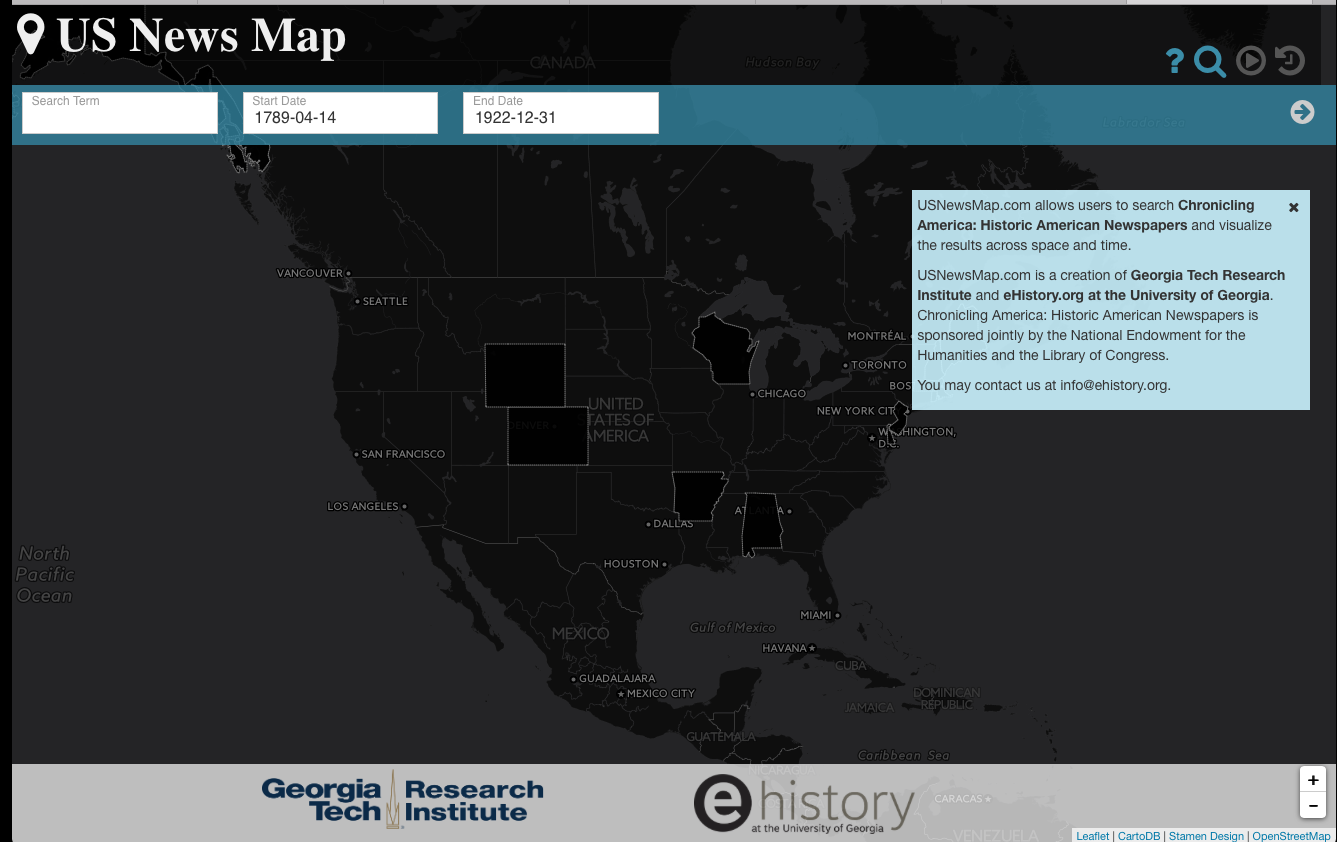

In [23]:
from IPython.display import Image
Image("http://localhost:8888/files/Documents/chronam-jupyter/img/US_News_Map_Screenshot_ChronAm.png")

Discover stuff

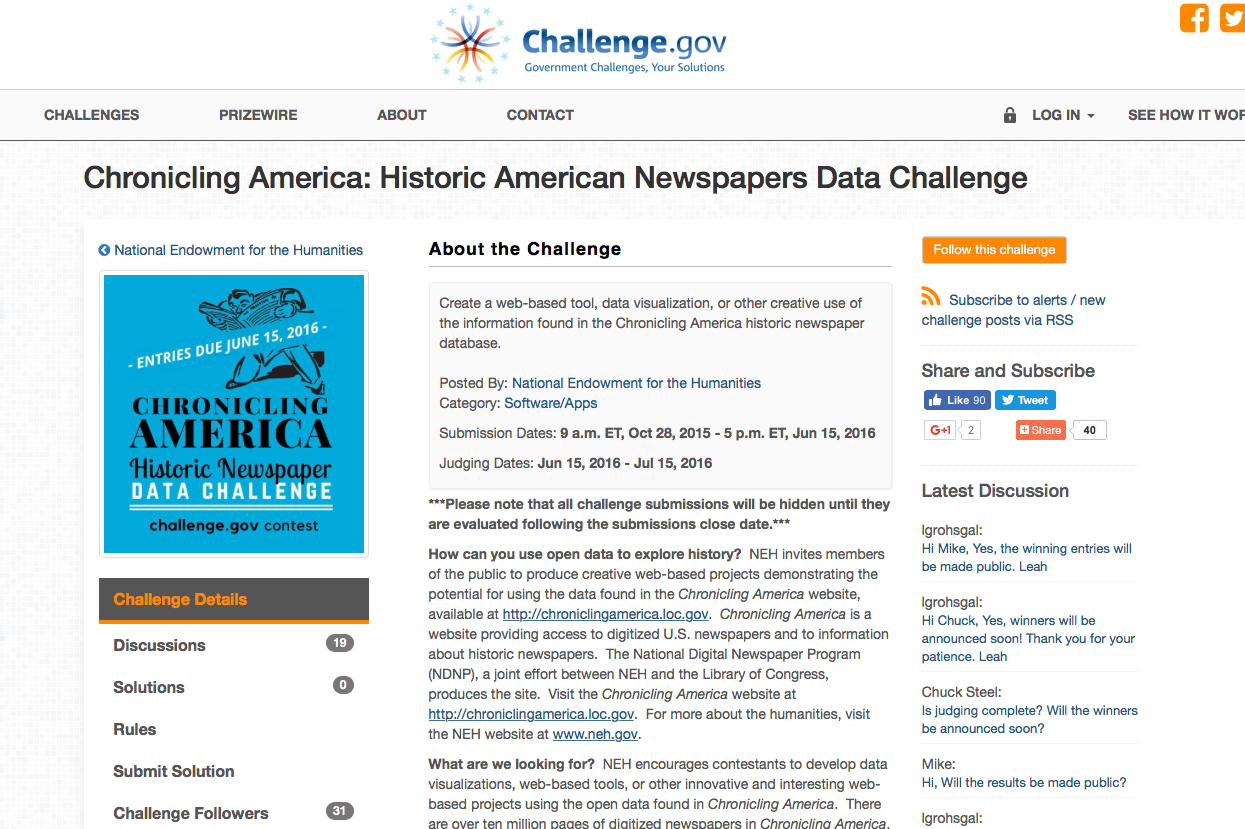

In [24]:
from IPython.display import Image
Image("http://localhost:8888/files/Documents/chronam-jupyter/img/NEH_Data_Challenge_ScreenShot_ChronAm.png")

## Let's Go!

In [1]:
import requests

In the next block, you just need to fill in some API URL. For example, put "http://chroniclingamerica.loc.gov/search/pages/results/?state=Arizona&format=json" in there.

In [2]:
r = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?state=Arizona&format=json").json()

Now, we have that page (go ahead, you can click on it to look at it and see what it looks like) availble to us in this little script. We can already do some cool stuff:

 - how many total items are there in this search?

In [3]:
r['totalItems']



311217

Easy peasy! Now let's look at some of the items:

In [10]:
page_url = r['items'][0]['url']
print(page_url)

http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1/seq-2.json


In [6]:
r['items'][0]['ocr_eng']

'TilU AIUZOXA JIU\'U1I1jICA: SUNDA.Y SlOIiMKU, JLTKK lO, 1\'JOO\nTHE ARIZONA REPUBLICAN\nPublished Every Day in the Year bj\nTHE\nArizona Publishing Co.\nGEO. W. VICKERS. Pres. and Cen. Mg.\nExclusive Morning Associated Press\nP\'spatches. . ,\nThe only Perfecting Prss In Arizona\nThe only battery of Linotypes In\nArizona.\nPublication office: 35-38 East Adams\nstreet. Telephone Main 47.\nEntered at the postoffiee at Phoenix,\nArizona, as mall matter of the second\nclass.\nSUBSCRIPTION RATES.\nBy mail, dally, one year WOO\nWeekly, one year 2.00\nCash in advance.\nBY CARRIER.\nDally, per month 73 cts\nUNlONfcQLrL\nPHOENIX. ARIZONA, JL\'XLO U. 1906.\nA BEGGING SENATORSHIP.\nThe rejection by that unambitious ag\nlku\'turist, the Hon. Dwtght Coburn. of\nthe appointment to the vacant Kansas\nsenatorship need not be attributed to\nhis utter disregard of pomp and pow\ner. Mr. Coburn is already in power,\nvast power, practically illimitab\'.e pow\ner. He is lord of the immeasurable\ncornfie\'d

In [8]:
requests.get(page_url).json()

{'issue': {'date_issued': '1906-06-10',
  'url': 'http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1.json'},
 'jp2': 'http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1/seq-2.jp2',
 'ocr': 'http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1/seq-2/ocr.xml',
 'pdf': 'http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1/seq-2.pdf',
 'sequence': 2,
 'text': 'http://chroniclingamerica.loc.gov/lccn/sn84020558/1906-06-10/ed-1/seq-2/ocr.txt',
 'title': {'name': 'Arizona republican.',
  'url': 'http://chroniclingamerica.loc.gov/lccn/sn84020558.json'}}

Now we're going to change up a little bit and do some search terms. This is a bit different, because now the search is based on a relevancy ranking (unlike the previous one). So click on this search to see what it looks like:

http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=bedbugs

And then add "&format=json" to the end of it to get the API version again:

In [11]:
b = requests.get('http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=bedbugs&format=json').json()

We can do the same thing we did before, and just see how many results there are:

In [12]:
b['totalItems']

29984

And we can look at the items themselves again:

In [13]:
b['items'][0]['url']

'http://chroniclingamerica.loc.gov/lccn/sn83045487/1912-06-18/ed-1/seq-31.json'

Maybe now, we want to try something more complicated, like asking, "which state has the most problem with bedbugs" as is evidenced by the entirely scientific first hundred results for the search "bedbugs" on ChronAm. Note that we added "&rows=100" to this, which means "give me the first hundred results". Most search engines (including this one) let us paginate the results and pick which page we want. Without picking one, we get the first one. So, the top 100 most relevant results.

In [4]:
p = requests.get("http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=bedbugs&rows=20&format=json").json()

Now we're going to loop over all the results:

In [5]:
for page in p['items']:
    print(page['state'])

['Illinois']
['Illinois']
['Illinois']
['Illinois']
['Illinois']
['Illinois']
['Illinois']
['Illinois']
['South Dakota']
['Illinois']
['Oregon']
['Illinois']
['Illinois']
['Mississippi']
['Missouri']
['Kansas']
['Minnesota']
['South Dakota']
['Oregon']
['Pennsylvania']


In [7]:
from collections import Counter

In [8]:
c = Counter()
for page in p['items']:
    c[page['state'][0]] += 1
    
c.most_common()

[('Illinois', 11),
 ('South Dakota', 2),
 ('Oregon', 2),
 ('Pennsylvania', 1),
 ('Minnesota', 1),
 ('Missouri', 1),
 ('Mississippi', 1),
 ('Kansas', 1)]

Now, it's easy enough to hate on Illinios about their obvious bedbug problem, but this is where understanding the results probably requires a human who understands the collections a little bit. Any guesses? Let's ask a librarian!

http://www.loc.gov/rr/askalib/

(I'll give you a hint: http://chroniclingamerica.loc.gov/lccn/sn83045487/1916-09-14/ed-1/seq-1/)


Let's get this data cleaned up and tab separated so we can copy and paste it into our favorite spreadsheet application.

In [10]:
for state in c.most_common(): 
    print("%s\t%s" % state)

Illinois	11
South Dakota	2
Oregon	2
Pennsylvania	1
Minnesota	1
Missouri	1
Mississippi	1
Kansas	1


Why did we get such a bad answer? Well, we started with a bad question (you'll do better than us on that!), and we needed help interpretting the data. BUT -- you can take this code an tweak it a bit and experiment yourself. Hope this gets you started.